In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [2]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = to_categorical(train_labels)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255
test_images = test_images / 255 

In [11]:
np.shape(x_train)

(18000, 32, 32, 3)

In [3]:
x_train, x_unlab, y_train, y_unlab = train_test_split( train_images, train_labels , test_size=0.5, random_state=42 )

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split( x_train,y_train , test_size=0.2, random_state=40 )

In [25]:
len(x_unlab)

25000

In [5]:
arr = np.concatenate((X_train, x_unlab))
X_all = arr
arr = np.concatenate((Y_train, y_unlab))
Y_all = arr

In [24]:
len(Y_all)

40000

In [3]:
# Helper function for merging new history objects with older ones
def append_history(losses, val_losses, accuracy, val_accuracy, history):
    losses = losses + history.history["loss"]
    val_losses = val_losses + history.history["val_loss"]
    accuracy = accuracy + history.history["accuracy"]
    val_accuracy = val_accuracy + history.history["val_accuracy"]
    return losses, val_losses, accuracy, val_accuracy


# Plotter function
def plot_history(losses, val_losses, accuracies, val_accuracies):
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(["train_loss", "val_loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(["train_accuracy", "val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

In [31]:
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'num_patches': self.num_patches,
            'projection': self.projection,
            'position_embedding': self.position_embedding
        })
        return config

In [32]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection =keras.Sequential(
            [
                (layers.Conv2D(4, (3, 3), strides=(2,2),activation='relu')),
                TimeDistributed(Flatten()),
                layers.LSTM(projection_dim,return_sequences=True,dropout=0.1),
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [7]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model():
    
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3),))
    model.add(layers.Conv2D(64, (3, 3),))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3),))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(.2))
    model.add(layers.Flatten()) 
    model.add(layers.Dense(32))
    model.add(layers.Dropout(.2))
    model.add(layers.Dense(10, activation="softmax"))

    model.summary()
    return model

In [4]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

num_classes = 10
input_shape = (32, 32, 3)

def create_model():
    
    
    resnet = tf.keras.applications.ResNet50V2( include_top=False, weights=None, input_shape=input_shape, pooling="avg" )

    inputs = keras.Input(shape=input_shape)
    augmented = resnet(inputs)
    outputs = layers.Dense(10, activation="softmax")(augmented)
    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-model")
    return model

    model.add()

    model.summary()
    return model

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_46 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_48 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                 

Epoch 21/100
500/500 [==============================] - ETA: 0s - loss: 0.5162 - accuracy: 0.8166
Epoch 21: val_loss did not improve from 0.98252
500/500 [==============================] - 62s 125ms/step - loss: 0.5162 - accuracy: 0.8166 - val_loss: 1.2290 - val_accuracy: 0.6525
Epoch 22/100
500/500 [==============================] - ETA: 0s - loss: 0.4853 - accuracy: 0.8279
Epoch 22: val_loss did not improve from 0.98252
500/500 [==============================] - 57s 115ms/step - loss: 0.4853 - accuracy: 0.8279 - val_loss: 1.1724 - val_accuracy: 0.6596
Epoch 23/100
500/500 [==============================] - ETA: 0s - loss: 0.4780 - accuracy: 0.8280
Epoch 23: val_loss did not improve from 0.98252
500/500 [==============================] - 57s 114ms/step - loss: 0.4780 - accuracy: 0.8280 - val_loss: 1.2067 - val_accuracy: 0.6708
Epoch 24/100
500/500 [==============================] - ETA: 0s - loss: 0.4540 - accuracy: 0.8400
Epoch 24: val_loss did not improve from 0.98252
500/500 [=====

500/500 [==============================] - ETA: 0s - loss: 0.2056 - accuracy: 0.9289
Epoch 79: val_loss did not improve from 0.98252
500/500 [==============================] - 66s 131ms/step - loss: 0.2056 - accuracy: 0.9289 - val_loss: 1.9817 - val_accuracy: 0.6438
Epoch 80/100
500/500 [==============================] - ETA: 0s - loss: 0.1980 - accuracy: 0.9321
Epoch 80: val_loss did not improve from 0.98252
500/500 [==============================] - 62s 124ms/step - loss: 0.1980 - accuracy: 0.9321 - val_loss: 1.9853 - val_accuracy: 0.6441
Epoch 81/100
500/500 [==============================] - ETA: 0s - loss: 0.1897 - accuracy: 0.9353
Epoch 81: val_loss did not improve from 0.98252
500/500 [==============================] - 61s 122ms/step - loss: 0.1897 - accuracy: 0.9353 - val_loss: 2.1466 - val_accuracy: 0.6320
Epoch 82/100
500/500 [==============================] - ETA: 0s - loss: 0.2104 - accuracy: 0.9296
Epoch 82: val_loss did not improve from 0.98252
500/500 [==================

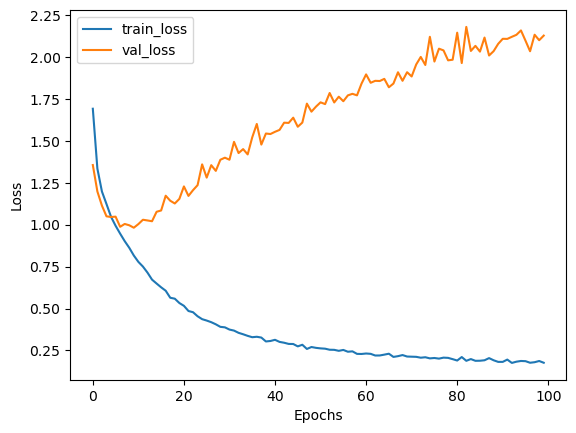

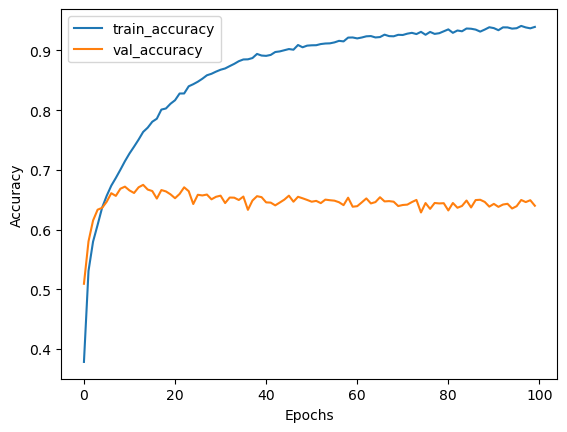

----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 2.2606823444366455, 'accuracy': 0.6251000165939331}
----------------------------------------------------------------------------------------------------


In [25]:
# callbacks=[keras.callbacks.EarlyStopping(patience=4, verbose=1), ],

def train_all_data_model(X_train, X_test, Y_train, Y_test):
    
    X_train, Y_train = shuffle(X_train, Y_train)
    
    model = create_model()
    model.compile( loss="categorical_crossentropy",  optimizer="Adam",  metrics='accuracy' )
    
    early_stopping = keras.callbacks.EarlyStopping(patience=15, verbose=1)

    history = model.fit( X_train, Y_train, batch_size = 64, epochs=100,
                        validation_split=.20,callbacks=[ keras.callbacks.ModelCheckpoint( "FullModelCheckpoint.h5",
                        verbose=1, save_best_only=True ) ], )

    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )


    print("-" * 100)
    print(
        "Test set evaluation: ",
        model.evaluate( X_test, Y_test , verbose=0, return_dict=True),
    )
    print("-" * 100)
    return model


full_dataset_model = train_full_model(X_all, X_test, Y_all, Y_test)

In [ ]:
# callbacks=[keras.callbacks.EarlyStopping(patience=4, verbose=1), ],

def train_full_model(X_train, X_test, Y_train, Y_test):
    
    X_train, Y_train = shuffle(X_train, Y_train)
    
    model = create_model()
    model.compile( loss="categorical_crossentropy",  optimizer="Adam",  metrics='accuracy' )
    
    early_stopping = keras.callbacks.EarlyStopping(patience=15, verbose=1)

    history = model.fit( X_train, Y_train, batch_size = 64, epochs=100,
                        validation_split=.20,callbacks=[ keras.callbacks.ModelCheckpoint( "FullModelCheckpoint.h5",
                        verbose=1, save_best_only=True ) ], )

    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )


    print("-" * 100)
    print(
        "Test set evaluation: ",
        model.evaluate( X_test, Y_test , verbose=0, return_dict=True),
    )
    print("-" * 100)
    return model


full_dataset_model = train_full_model(X_train, X_test, Y_train, Y_test)

In [5]:
def train(model,X_train, Y_train,epochs):
    
    X_train, Y_train = shuffle(X_train, Y_train)

    print(f"Starting to train with {len(Y_train)} samples")

    history = model.fit(X_train, Y_train, batch_size = 64, epochs=epochs,validation_split=.20)
    
    #plot_history(
    #    history.history["loss"],
    #    history.history["val_loss"],
    #    history.history["accuracy"],
    #    history.history["val_accuracy"],
    #)

    return model

In [6]:
def test(model, X_test, Y_test):
    print("-" * 100)
    print("Test set evaluation: ", model.evaluate( X_test, Y_test , verbose=0, return_dict=True), )
    print("-" * 100)

In [ ]:
from sklearn.metrics import confusion_matrix
import random

def train_active_learning_models(
    model,
    X_train,
    Y_train,
    x_unlab,
    y_unlab,
    X_test,
    Y_test,
    num_iterations=2
):
    test(model, X_test, Y_test)
    
    d = 100/num_iterations
    l = len(y_unlab)
    x = 500
    
    for iteration in range(num_iterations):

        model = tf.keras.models.load_model('saved_model/my_model')
        
        l = len(y_unlab)
        
        print("\n\n")
        
        print("Iteration : ")
        
        print(iteration)
        
        print("\n\n")
         
        #generate random number and substract from all numbers
        rnd = random.sample(range(1, l), x)
        all = list(range(1, l))
        main_list = list(set(all) - set(rnd))
        
        #add those index to from unlablled set to training set
        new_lab = x_unlab[rnd]
        arr = np.concatenate((X_train, new_lab))
        X_train = arr

        #predict on the set and add to training data
        new_y = y_unlab[rnd]
        arr = np.concatenate((Y_train, new_y))
        Y_train = arr
        
        
        #create the new unlabelled set
        x_unlab = x_unlab[main_list]

        #create the new unlabelled label set
        y_unlab = y_unlab[main_list]
        
        
        #train on data
        model = train(model,X_train, Y_train,1)
        
        #test for final time
        test(model, X_test, Y_test)

        model.save('saved_model/my_model')

        del model
    

from tensorflow.keras.utils import to_categorical
(x_train, y_train),( X_test, Y_test )= cifar10.load_data()
x_train = x_train.astype('float32')
X_test = X_test.astype('float32')
x_train = x_train / 255
X_test = X_test / 255 

y_train = to_categorical( y_train)
Y_test = to_categorical( Y_test)
X_train, x_unlab, Y_train, y_unlab = train_test_split( x_train,y_train, test_size=0.95, random_state=42 )


model = create_model()
    
model.compile(
        loss="categorical_crossentropy",
        optimizer="Adam",
        metrics='accuracy',
    )
    
model = train(model,X_train, Y_train,50)

model.save('saved_model/my_model')

active_learning_model = train_active_learning_models(model,X_train,Y_train,x_unlab,y_unlab,X_test,Y_test,num_iterations=10)

Starting to train with 2500 samples
Epoch 1/50
